In [2]:
import math
import matplotlib.pyplot as plt

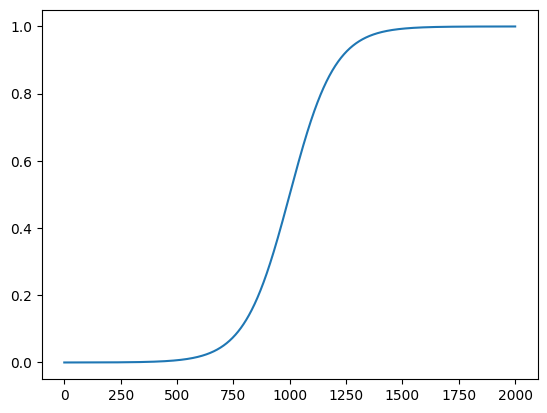

In [3]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

values = [sigmoid(x / 100) for x in range(-1000, 1001)]
plt.plot(values)
plt.show()

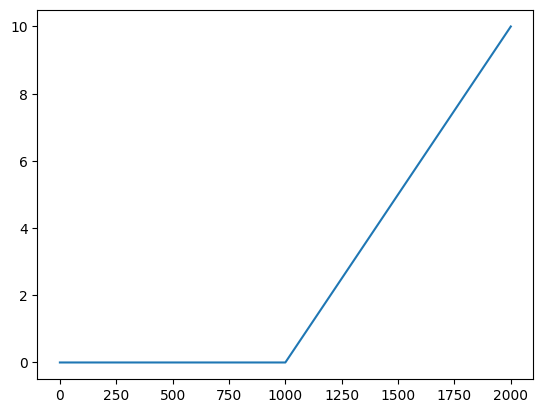

In [4]:
def relu(x):
    return max(x, 0.0)

values = [relu(x / 100) for x in range(-1000, 1001)]
plt.plot(values)
plt.show()

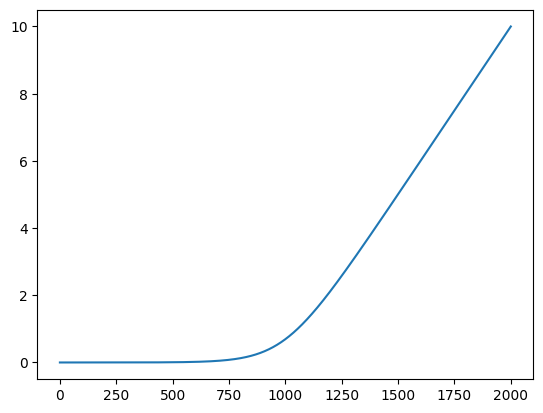

In [5]:
def softplus(x):
    return math.log(1.0 + math.exp(x))

values = [softplus(x / 100) for x in range(-1000, 1001)]
plt.plot(values)
plt.show()

## Softmax

In [12]:
import numpy as np

def softmax(values):
    # e^x[i]/sum(e^x[j])
    s = np.sum(np.exp(values))
    return np.exp(values) / s

data = np.array([1, 2, 3, 4, 6])
print(softmax(data))
# probability for `6` has the highest value 

[0.00556774 0.01513469 0.04114036 0.11183108 0.82632613]


In [14]:
# if we multiply source numbers with their probabilities and get the sum,
# the result will be close to the maximum value from the source numbers

data = np.array([1, 30, 3, 4, 5])
print(np.sum(data * softmax(data)))
# very close to 30, since a big difference between the max and the second max values 

data = np.array([1, 2, 3, 4, 5])
print(np.sum(data * softmax(data)))
# between the max and the second max values since the difference between them is low

29.99999999946184
4.451941567662194


## Softmin

In [19]:
def softmin(values):
    s = np.sum(np.exp(-values))
    return np.exp(-values) / s

data = np.array([1, 2, 3, 4, 5])
print(softmin(data))
print(np.sum(data * softmin(data)))  # close to both 1 and 2

data = np.array([1, 2, -3, 4, 5])
print(softmin(data))
print(np.sum(data * softmin(data)))  # close to -3

[0.63640865 0.23412166 0.08612854 0.03168492 0.01165623]
1.5480584323378053
[1.78462655e-02 6.56527418e-03 9.74373081e-01 8.88513241e-04
 3.26865754e-04]
-2.886954048382224


## Example

Depending on the maximum value in `scores` array, we want to choose the corresponding element from `vectors` array. 

First, we count probabilities with the softmax function. Then we use the probabilities to measure a candidate for each of three places in the `avg` array. 

In [24]:

# the maximum is `scores[5]`
scores = np.array([-5, 1, 2, 2, 5, 2])

probs = softmax(scores)
print(probs)

vectors = np.array([
    [1, 2, 3],
    [3, 2, 1],
    [0, 0, 0],
    [-1, -1, -1],
    [2, 2, 2],
    [2, 4, 8],
])

avg = np.sum(vectors.T * probs, axis = 1)
print(avg)
# the `avg` is close to `vectors[5] = [2, 2, 2]`

[3.88790485e-05 1.56849276e-02 4.26360538e-02 4.26360538e-02
 8.56368032e-01 4.26360538e-02]
[1.80246578 1.87209184 2.02699001]


In [30]:

# the maximum is `scores[1]`
scores = np.array([-5, 10, 2, 2, 3, 2])

probs = softmax(scores)
print(probs)

vectors = np.array([
    [1, 2, 3],
    [3, 2, 1],
    [0, 0, 0],
    [-1, -1, -1],
    [2, 2, 2],
    [2, 4, 8],
])

avg = np.sum(vectors.T * probs, axis = 1)
print(avg)
# the `avg` is close to `vectors[1] = [3, 2, 1]`

0.012752 0.034663 0.000234 0.256127 0.696225
[2.99641069 1.99899554 1.00225003]
